In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import sklearn as sk

In [2]:
df= pd.read_csv(r"C:\Users\Lucky Prem\Downloads\organizations-100\heart-disease.csv")
df

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


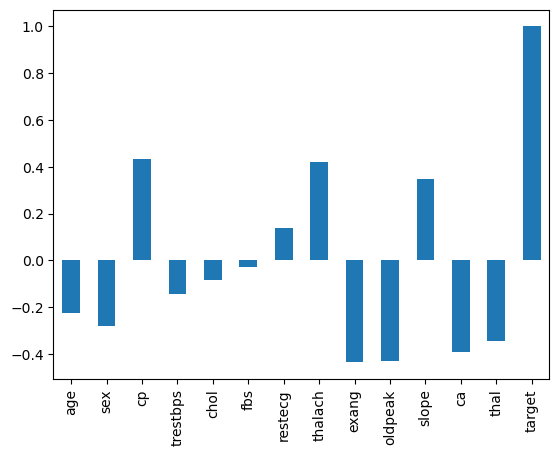

In [7]:
df.corr()['target'].plot(kind='bar');

In [4]:
X= df.drop(columns=['target', 'fbs'])
y= df['target']
X.head()

,age,sex,cp,trestbps,chol,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,0,150,0,2.3,0,0,1
1,37,1,2,130,250,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,172,0,1.4,2,0,2
3,56,1,1,120,236,1,178,0,0.8,2,0,2
4,57,0,0,120,354,1,163,1,0.6,2,0,2


In [5]:
np.random.seed(1)
from sklearn.model_selection import train_test_split
xtr, xt, ytr, yt= train_test_split(X, y, test_size=0.1)
yt.head()

204    0
159    1
219    0
174    0
184    0
Name: target, dtype: int64

In [6]:
np.random.seed(1)
from sklearn.ensemble import RandomForestClassifier
clf=RandomForestClassifier()

clf.fit(xtr, ytr)
clf.score(xt,yt)

0.9032258064516129

In [7]:
from sklearn.model_selection import cross_val_score

np.random.seed(1)
for n in range(10,110,10):
    clf=RandomForestClassifier(n_estimators=n)
    print(n, cross_val_score(clf,X,y,cv=10).mean())

10 0.8088172043010753
20 0.8050537634408602
30 0.818279569892473
40 0.8317204301075269
50 0.8312903225806452
60 0.8413978494623656
70 0.8182795698924732
80 0.8248387096774193
90 0.824731182795699
100 0.8347311827956989


In [8]:
np.random.seed(1)
clf=RandomForestClassifier(n_estimators=60)
clf.fit(xtr, ytr)
clf.score(xt,yt)

0.9032258064516129

In [9]:
yt_pred=clf.predict(xt)
yt_pred

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [10]:
np.array(yt)

array([0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 1], dtype=int64)

In [11]:
np.mean(np.array(yt)==yt_pred)

0.9032258064516129

Make predictions with `predict_proba()` #returns probabilities for each class label in a classification task

In [12]:
clf.predict_proba(xt)

array([[0.86666667, 0.13333333],
       [0.23333333, 0.76666667],
       [0.91666667, 0.08333333],
       [1.        , 0.        ],
       [0.73333333, 0.26666667],
       [0.9       , 0.1       ],
       [1.        , 0.        ],
       [0.23333333, 0.76666667],
       [1.        , 0.        ],
       [0.11666667, 0.88333333],
       [0.38333333, 0.61666667],
       [0.58333333, 0.41666667],
       [0.16666667, 0.83333333],
       [0.61666667, 0.38333333],
       [0.56666667, 0.43333333],
       [0.26666667, 0.73333333],
       [0.03333333, 0.96666667],
       [0.86666667, 0.13333333],
       [0.18333333, 0.81666667],
       [0.26666667, 0.73333333],
       [0.15      , 0.85      ],
       [0.88333333, 0.11666667],
       [0.45      , 0.55      ],
       [0.26666667, 0.73333333],
       [0.06666667, 0.93333333],
       [0.01666667, 0.98333333],
       [0.95      , 0.05      ],
       [0.11666667, 0.88333333],
       [0.33333333, 0.66666667],
       [0.08333333, 0.91666667],
       [0.

In [26]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing()
housing

{'data': array([[   8.3252    ,   41.        ,    6.98412698, ...,    2.55555556,
           37.88      , -122.23      ],
        [   8.3014    ,   21.        ,    6.23813708, ...,    2.10984183,
           37.86      , -122.22      ],
        [   7.2574    ,   52.        ,    8.28813559, ...,    2.80225989,
           37.85      , -122.24      ],
        ...,
        [   1.7       ,   17.        ,    5.20554273, ...,    2.3256351 ,
           39.43      , -121.22      ],
        [   1.8672    ,   18.        ,    5.32951289, ...,    2.12320917,
           39.43      , -121.32      ],
        [   2.3886    ,   16.        ,    5.25471698, ...,    2.61698113,
           39.37      , -121.24      ]]),
 'target': array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894]),
 'frame': None,
 'target_names': ['MedHouseVal'],
 'feature_names': ['MedInc',
  'HouseAge',
  'AveRooms',
  'AveBedrms',
  'Population',
  'AveOccup',
  'Latitude',
  'Longitude'],
 'DESCR': '.. _california_housing_dataset:\n

In [42]:
df2= pd.DataFrame(housing['data'], columns=housing['feature_names']) 
df2

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25
...,...,...,...,...,...,...,...,...
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32


In [52]:
housing['target']

array([4.526, 3.585, 3.521, ..., 0.923, 0.847, 0.894])

In [43]:
X=df2
y=housing['target']
y.shape

(20640,)

In [44]:
np.random.seed(0)
xtr, xt, ytr, yt=train_test_split(X, y, test_size=0.1)
yt

array([1.369, 2.413, 2.007, ..., 2.379, 2.451, 1.635])

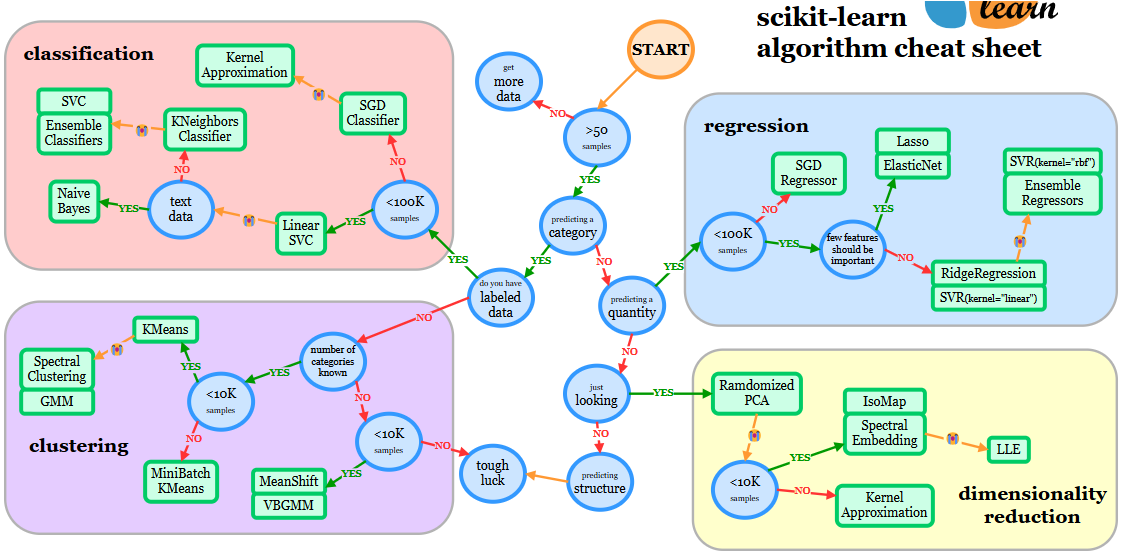

In [45]:
from IPython.display import Image 
Image(filename=r"C:\Users\Lucky Prem\OneDrive\Desktop\Screenshot 2025-01-28 201158.png", width=900, height=700)

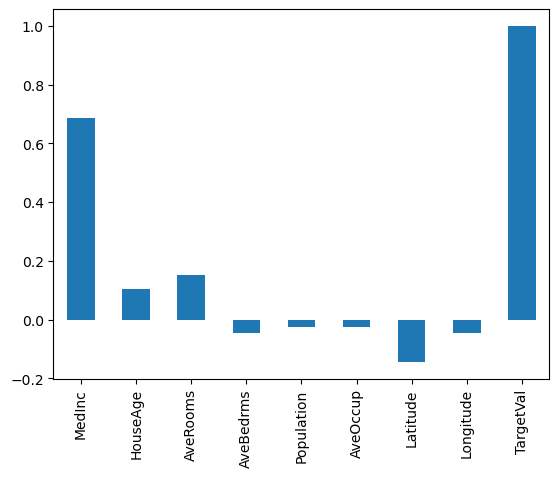

In [46]:
df2['TargetVal']= y
df2.corr()['TargetVal'].plot(kind='bar');

In [56]:
from sklearn.linear_model import Ridge
reg= Ridge()
#xtr.drop('AveOccup', axis=1, inplace=True)
#xt.drop('AveOccup', axis=1, inplace=True)

reg.fit(xtr, ytr)
reg.score(xt, yt)

0.6097880506077125

In [51]:
from sklearn.svm import SVR
reg=SVR()

reg.fit(xtr, ytr)
reg.score(xt, yt)

-0.013973978587870084

SVR might not work well because it uses distances in the kernel. As we didn't mention scaling, so our data isn't normalized. Ridge Regression, on the other hand, can handle different scales better because it's a linear model with regularization, but even then, scaling helps. The dataset size could matter. SVR doesn't scale well with large datasets, but looking at this data, there are around 20k samples. That's manageable, but maybe not with the default settings. Ridge is more efficient for larger datasets.
Our features have vastly different scales/ranges:
MedInc (0-8)
Population (322-2401)
Latitude (37-39)

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
#When you scale manually, you have to remember to apply the same scaling steps every time you use the model, including when making predictions on new data. If you don't, there could be data leakage or inconsistent scaling, leading to poor performance. However, using a pipeline automates this process. The pipeline ensures that the same scaler used during training is applied automatically during any subsequent prediction, which is especially important when deploying the model or using it in cross-validation.
svreg= make_pipeline(StandardScaler(),SVR()) 
svreg.fit(xtr,ytr)
svreg.score(xt,yt)

0.7653309673576572

In [57]:
from sklearn.ensemble import RandomForestRegressor
np.random.seed(0)
reg=RandomForestRegressor()

reg.fit(xtr, ytr)
reg.score(xt,yt)

0.8163820354053156

In [58]:
#Evaluate the model/ Compare the prediction to the truth
y_pred= reg.predict(xt)
y_pred

array([1.36799  , 2.5859801, 1.41042  , ..., 2.30859  , 3.0179201,
       1.46317  ])

In [59]:
yt

array([1.369, 2.413, 2.007, ..., 2.379, 2.451, 1.635])

In [60]:
from sklearn.metrics import mean_squared_error

"mean squared error" (MSE) refers to a metric used to evaluate how well a model's predictions align with actual data, calculated by `averaging the squared differences between the predicted values and the true values`

In [61]:
mean_squared_error(yt, y_pred) #our prediction are on average + or -0.25234842296973237 different from the actual target values

0.25234842296973237